In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import cluster
from sklearn import preprocessing

Task: Segment mall customers to build marketing strategy

In [149]:
data = pd.read_csv("/Users/apple/Documents/!data analysis/Kaggle/Mall_Customers.csv")

In [150]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [151]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Let's transform sex into categoric variables 1=Male 0=Female

In [152]:
le = preprocessing.LabelEncoder()

In [153]:
sex = le.fit_transform(data["Gender"])

In [154]:
data.insert(3,"Gender_new",sex)

In [155]:
data.head()

,CustomerID,Gender,Age,Gender_new,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,1,15,39
1,2,Male,21,1,15,81
2,3,Female,20,0,16,6
3,4,Female,23,0,16,77
4,5,Female,31,0,17,40


In [156]:
data = data.drop(["Gender"],axis=1)

In [157]:
#Check weather there are Nones (Hopefully no, because counts are equal for all features)
#data.isnull().any().any() - for all df
data.isnull().any()

CustomerID                False
Age                       False
Gender_new                False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [158]:
data.corr(method="pearson")

,CustomerID,Age,Gender_new,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.057400,0.977548,0.013835
Age,-0.026763,1.000000,0.060867,-0.012398,-0.327227
Gender_new,0.057400,0.060867,1.000000,0.056410,-0.058109
Annual Income (k$),0.977548,-0.012398,0.056410,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,-0.058109,0.009903,1.000000


There is no obvious correlations between features except for negative correlation between Age and Spending score.

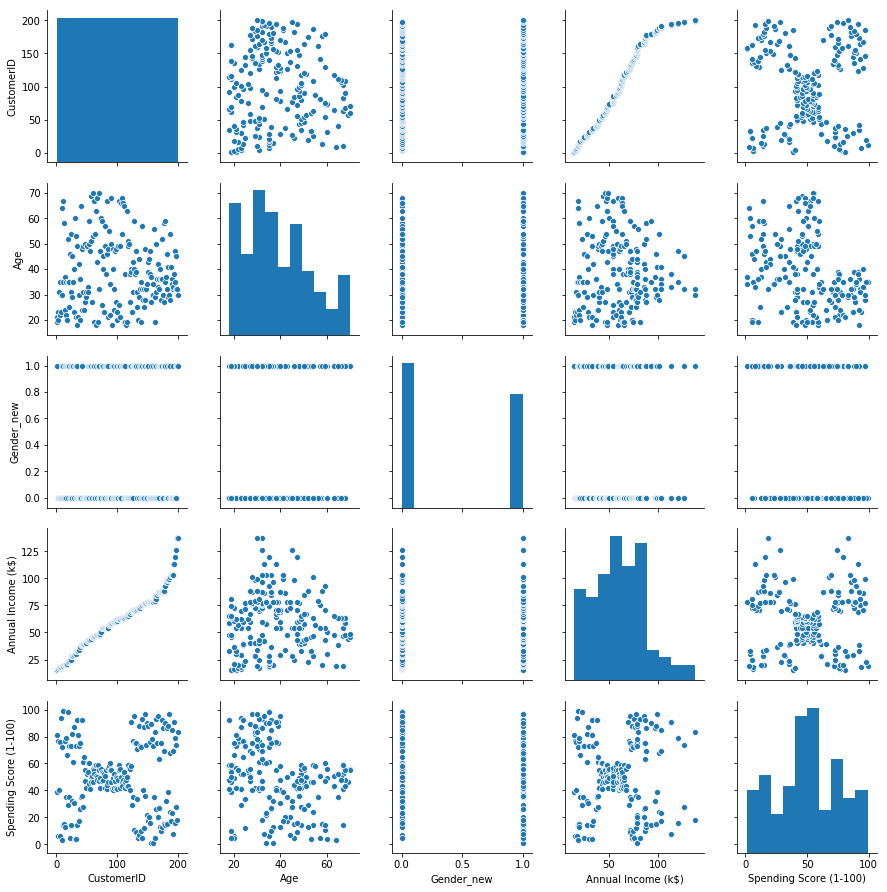

In [159]:
sns.pairplot(data)
plt.show()

From pairplot I see clusters in 
* **Spending score + Annual Income**
* **Age + Spending Score**
Age and Annual Income is not necessary to cluster, since our task is to get clusters for marketing promotion. For this task Spending score is much more important. 

Thus, we'll have clusters on how people spend their money in accordance with age and annual income.

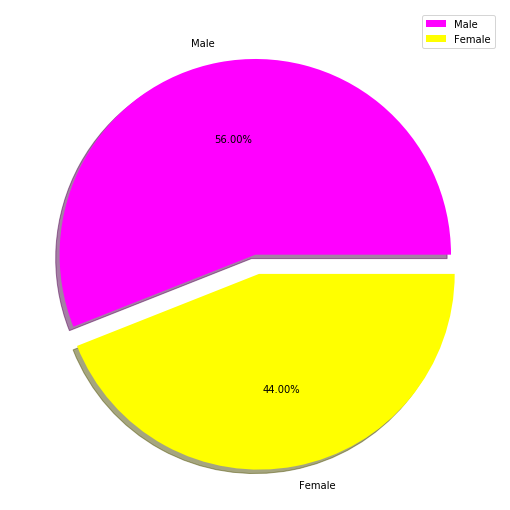

In [160]:
#Look at distributions. Sex
labels = ["Male", "Female"]
size = data['Gender_new'].value_counts() #counts the number of entries
colors = ['magenta', 'yellow']
plt.rcParams['figure.figsize'] = (9, 9)
explode = [0, 0.1] #dividing pie's segments
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%') 
#autopct - format for percents
plt.legend()
plt.show()

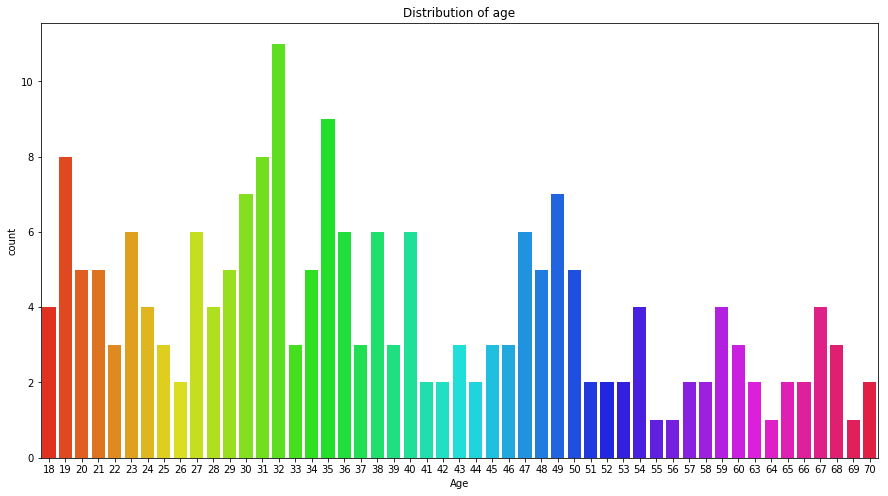

In [161]:
#Look at distributions. Age
plt.rcParams["figure.figsize"] = (15, 8)
sns.countplot(data["Age"], palette = "hsv")
plt.title("Distribution of age")
plt.show()
#Here I see, that moda is 32 years, thus youngsters are more likely to visit the mall 

Text(0.5, 1.0, 'Annual Income')

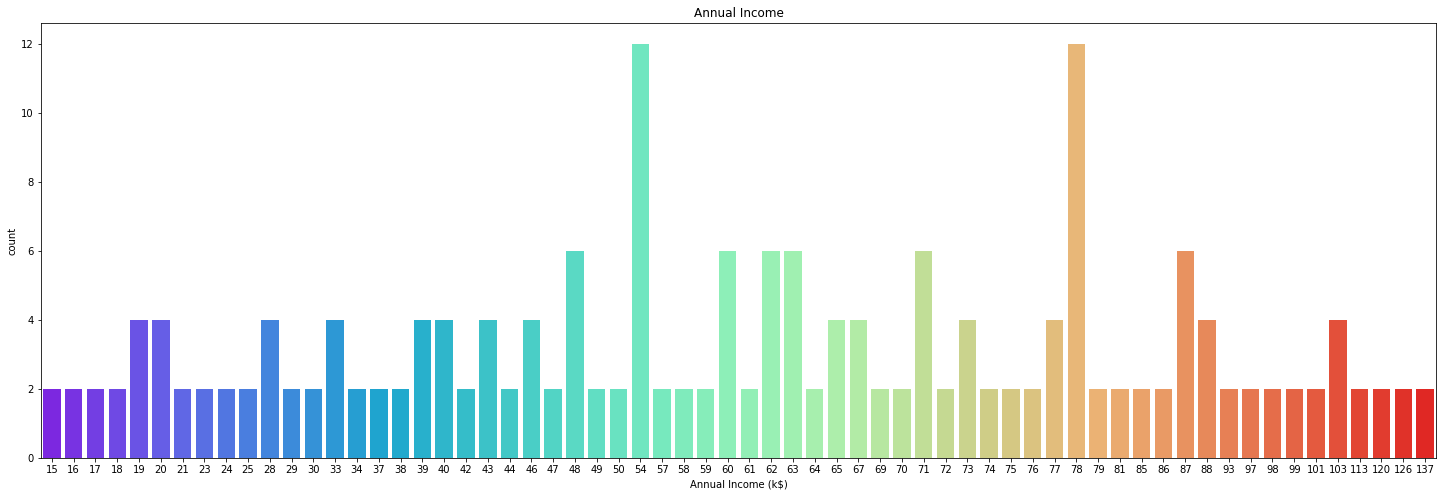

In [162]:
#Look at distributions. Annual Income
plt.rcParams["figure.figsize"] = (25, 8)
sns.countplot(data["Annual Income (k$)"], palette = "rainbow")
plt.title("Annual Income")
#I see rather big range of annual income, from the describtion table I know that mean is ~61K$ 
#and 75% respondents have 78K$ (25%-75% = 41-78K$)

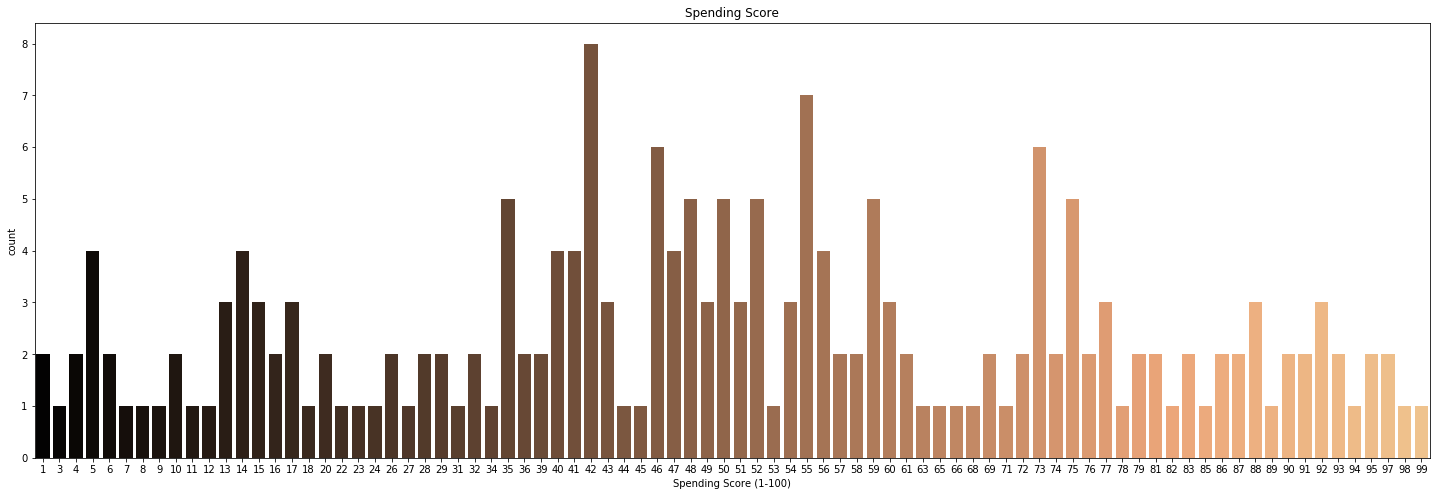

In [163]:
#Look at distributions. Spending Score
sns.countplot(data["Spending Score (1-100)"], palette = "copper")
plt.title("Spending Score")
#chart.set_xticklabels(data["Annual Income (k$)"], rotation=45, horizontalalignment='right')
plt.show()
#Moda is 42 and average - 50; 25%-75% respondents have 35-73 score. 

In [164]:
#Clustering1 Spending score + Annual Income
data1 = data.iloc[:,[3,4]]
cost_history = []
iter_history = []
for i in range(1, 11):
    model = cluster.KMeans(n_clusters=i, init="random")
    model.fit(data1)
    cost = model.inertia_
    iter_ = model.n_iter_
    cost_history.append(cost)
    iter_history.append(iter_)
print (iter_history)

[2, 10, 17, 6, 6, 7, 10, 13, 8, 9]


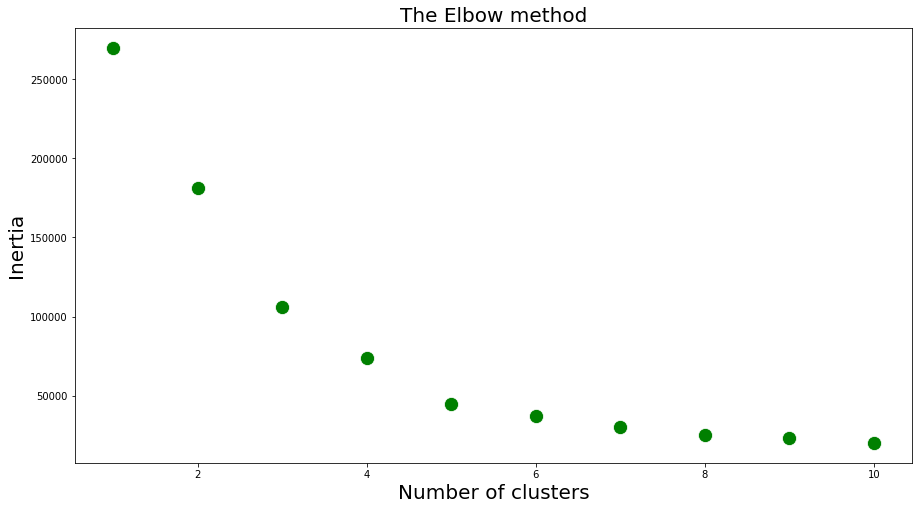

In [165]:
plt.rcParams["figure.figsize"] = (15, 8)
chart = sns.scatterplot(x=range(1, 11), y=cost_history, s=200, color="green")
chart.set_xlabel("Number of clusters", fontsize=20)
chart.set_ylabel("Inertia", fontsize=20)
plt.title("The Elbow method", fontsize=20)
plt.show()
#in this case on pairplot I see clear 5 clusters, that's why I try 5

In [166]:
#Let's have a look on 5 clusters
model = cluster.KMeans(n_clusters=5, init="random")
model.fit(data1)
prediction1 = model.fit_predict(data1)

In [167]:
data1 = data1.to_numpy()
data1[prediction1==1,0]

array([40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46, 47,
       47, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60, 60, 60, 61,
       61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64, 64, 65, 65,
       65, 65, 67, 67, 67, 67, 69, 71])

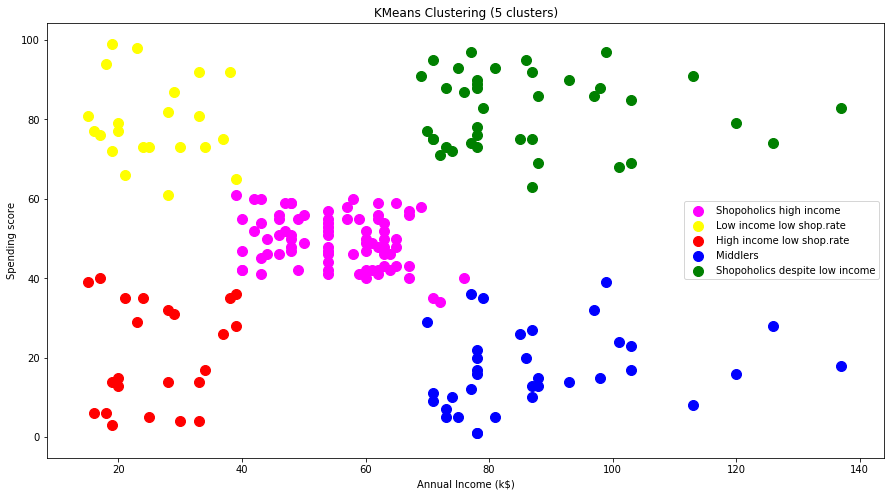

In [168]:
plt.scatter(data1[prediction1==0,0], data1[prediction1==0,1], s = 100, c = 'magenta', label = 'Shopoholics high income')
plt.scatter(data1[prediction1==1,0], data1[prediction1==1,1], s = 100, c = 'yellow', label = 'Low income low shop.rate')
plt.scatter(data1[prediction1==2,0], data1[prediction1==2,1], s = 100, c = 'red', label = 'High income low shop.rate')
plt.scatter(data1[prediction1==3,0], data1[prediction1==3,1], s = 100, c = 'blue', label = 'Middlers')
plt.scatter(data1[prediction1==4,0], data1[prediction1==4,1], s = 100, c = 'green', label = 'Shopoholics despite low income')

plt.legend()
plt.title("KMeans Clustering (5 clusters)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending score")
plt.show()

In [169]:
data.head()

,CustomerID,Age,Gender_new,Annual Income (k$),Spending Score (1-100)
0,1,19,1,15,39
1,2,21,1,15,81
2,3,20,0,16,6
3,4,23,0,16,77
4,5,31,0,17,40


In [170]:
#Clustering2 Spending score + Age
data2 = data.iloc[:,[1,4]]
cost_history = []
iter_history = []
for i in range(1, 11):
    model = cluster.KMeans(n_clusters=i, init="random")
    model.fit(data2)
    cost = model.inertia_
    iter_ = model.n_iter_
    cost_history.append(cost)
    iter_history.append(iter_)
print (iter_history)

[2, 9, 10, 17, 12, 11, 8, 9, 9, 9]


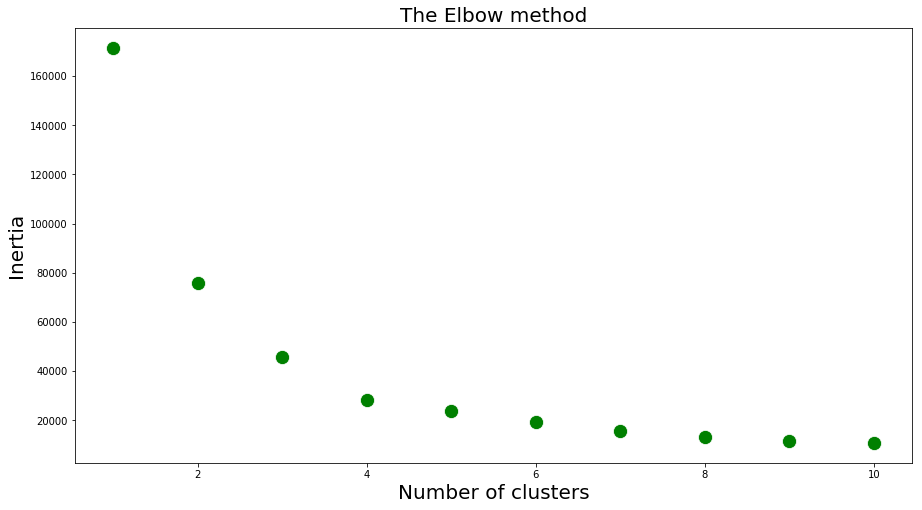

In [171]:
chart = sns.scatterplot(x=range(1, 11), y=cost_history, s=200, color="green")
chart.set_xlabel("Number of clusters", fontsize=20)
chart.set_ylabel("Inertia", fontsize=20)
plt.title("The Elbow method", fontsize=20)
plt.show()
#let's try 5 as well

In [172]:
model = cluster.KMeans(n_clusters=5, init="random")
model.fit(data2)
prediction2 = model.fit_predict(data2)
data2 = data2.to_numpy()

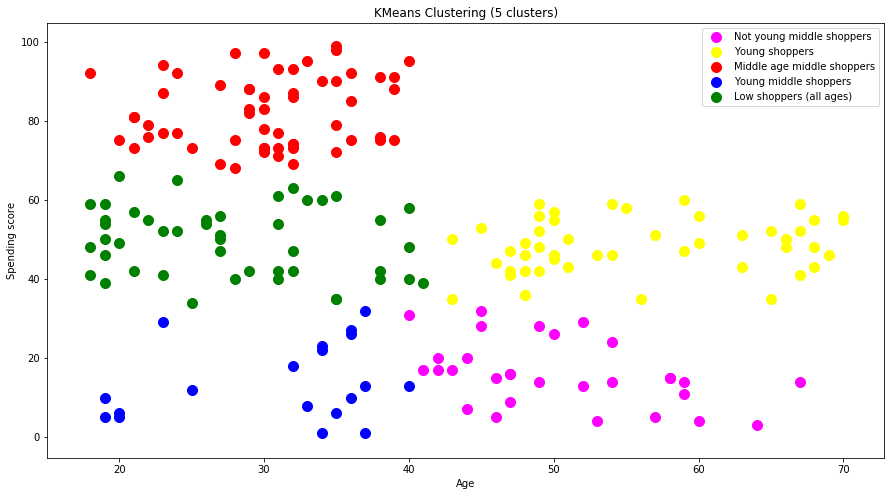

In [173]:
plt.scatter(data2[prediction2==0,0], data2[prediction2==0,1], s = 100, c = 'magenta', label = 'Not young middle shoppers')
plt.scatter(data2[prediction2==1,0], data2[prediction2==1,1], s = 100, c = 'yellow', label = 'Young shoppers')
plt.scatter(data2[prediction2==2,0], data2[prediction2==2,1], s = 100, c = 'red', label = 'Middle age middle shoppers')
plt.scatter(data2[prediction2==3,0], data2[prediction2==3,1], s = 100, c = 'blue', label = 'Young middle shoppers')
plt.scatter(data2[prediction2==4,0], data2[prediction2==4,1], s = 100, c = 'green', label = 'Low shoppers (all ages)')

plt.legend()
plt.title("KMeans Clustering (5 clusters)")
plt.xlabel("Age")
plt.ylabel("Spending score")
plt.show()

In [174]:
#However we can also cluster respondents in accordance with three features: age, spending score and income rate
#Thus it would be difficult to visualize 
data3 = data.iloc[:,[1,3,4]]
cost_history = []
iter_history = []
for i in range(1, 11):
    model = cluster.KMeans(n_clusters=i, init="random")
    model.fit(data3)
    cost = model.inertia_
    iter_ = model.n_iter_
    cost_history.append(cost)
    iter_history.append(iter_)
print (iter_history)

[2, 7, 8, 8, 5, 5, 8, 7, 5, 7]


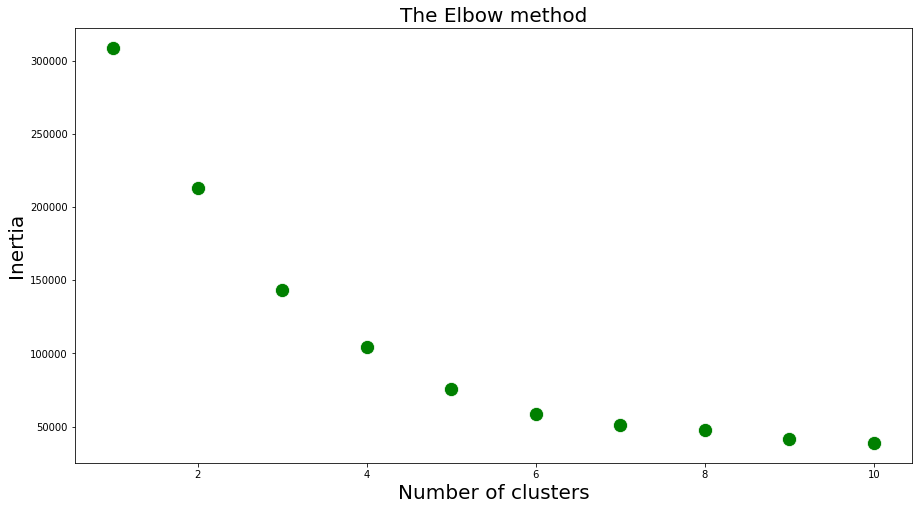

In [175]:
chart = sns.scatterplot(x=range(1, 11), y=cost_history, s=200, color="green")
chart.set_xlabel("Number of clusters", fontsize=20)
chart.set_ylabel("Inertia", fontsize=20)
plt.title("The Elbow method", fontsize=20)
plt.show()
#I'll take also 5

In [253]:
model = cluster.KMeans(n_clusters=5, init="random")
model.fit(data3)
prediction3 = model.fit_predict(data3)

In [254]:
prediction3

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 4, 3, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [255]:
from mpl_toolkits import mplot3d

In [256]:
data3_ = data3.to_numpy()

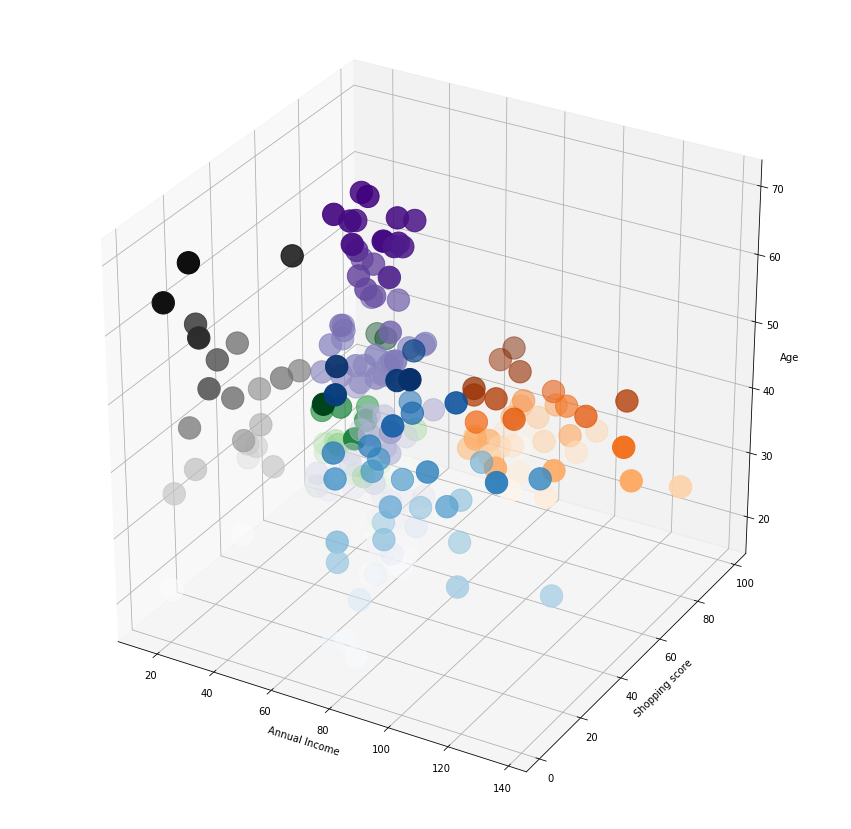

In [257]:
plt.rcParams["figure.figsize"] = (15, 15)
ax = plt.axes(projection='3d')
zdata1 = data3_[prediction3==0,0]
xdata1 = data3_[prediction3==0,1]
ydata1 = data3_[prediction3==0,2],
ax.scatter3D(xdata1, ydata1, zdata1, c=zdata1, cmap='Greys', s=500);
zdata2 = data3_[prediction3==1,0]
xdata2 = data3_[prediction3==1,1]
ydata2 = data3_[prediction3==1,2],
ax.scatter3D(xdata2, ydata2, zdata2, c=zdata2, cmap='Blues', s=500);
zdata3 = data3_[prediction3==2,0]
xdata3 = data3_[prediction3==2,1]
ydata3 = data3_[prediction3==2,2],
ax.scatter3D(xdata3, ydata3, zdata3, c=zdata3, cmap='Greens', s=500);
zdata4 = data3_[prediction3==3,0]
xdata4 = data3_[prediction3==3,1]
ydata4 = data3_[prediction3==3,2],
ax.scatter3D(xdata4, ydata4, zdata4, c=zdata4, cmap='Purples', s=500);
zdata5 = data3_[prediction3==4,0]
xdata5 = data3_[prediction3==4,1]
ydata5 = data3_[prediction3==4,2],
ax.scatter3D(xdata5, ydata5, zdata5, c=zdata5, cmap='Oranges', s=500);

ax.set_xlabel('Annual Income')
ax.set_ylabel('Shopping score')
ax.set_zlabel('Age')

plt.show()


**Possible colors**

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [277]:
data3.insert(0,"Cluster",prediction3)

In [278]:
data3.head()

,Cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,2,21,15,81
2,0,20,16,6
3,2,23,16,77
4,0,31,17,40


In [286]:
#Mean
data3[["Age","Annual Income (k$)", "Spending Score (1-100)","Cluster"]].groupby(["Cluster"], as_index=False).mean().sort_values(by="Cluster", ascending=True)

,Cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,45.217391,26.304348,20.913043
1,1,40.324324,87.432432,18.189189
2,2,24.960000,28.040000,77.000000
3,3,43.934211,55.210526,49.447368
4,4,32.692308,86.538462,82.128205


In [283]:
#Max
data3[["Age","Annual Income (k$)", "Spending Score (1-100)","Cluster"]].groupby(["Cluster"], as_index=False).max().sort_values(by="Cluster", ascending=True)

,Cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,67,39,40
1,1,59,137,40
2,2,35,48,99
3,3,70,71,60
4,4,40,137,97


In [287]:
#Min
data3[["Age","Annual Income (k$)", "Spending Score (1-100)","Cluster"]].groupby(["Cluster"], as_index=False).min().sort_values(by="Cluster", ascending=True)

,Cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,3
1,1,19,70,1
2,2,18,15,59
3,3,18,40,35
4,4,27,69,63


If I consider 3 features, I geth the following 5 clusters
* Age 19-67 with low income and low shopping rate (Cluster 0)
* Age 19-59 with middle or higher annual income, low shopping rate (Cluster 1)
* Age 18-35 with low annual income and high shopping rate (Cluster 2)
* All ages (18-70) with middle income and middle shopping rate (Cluster 3)
* Age 27-40 with high annual income and high shopping rate (Cluster 4)

### References
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html